In [95]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [96]:

import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from spacy.lang.en.stop_words import STOP_WORDS

##### Put the hyparameters at the top like this to make it easier to change and edit.

In [97]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

#### First, let's define two lists that containing articles and labels. In the meantime, we remove stopwords.

In [99]:
articles = []
labels = []

with open("data/bbc-news.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOP_WORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


In [101]:
set(labels)

{'business', 'entertainment', 'politics', 'sport', 'tech'}

#### There are only 2,225 articles in the data. Then we split into training set and validation set, according to the parameter we set earlier, 80% for training, 20% for validation.

In [67]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


Tokenizer does all the heavy lifting for us. In our articles that it was tokenizing, it will take 5,000 most common words. oov_token is to put a special value in when an unseen word is encountered. This means I want "OOV" in bracket to be used to for words that are not in the word index. "fit_on_text" will go through all the text and create dictionary like this:

In [68]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

You can see that "OOV" in bracket is number 1, "said" is number 2, "mr" is number 3, and so on.

In [69]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 's': 2,
 'said': 3,
 'mr': 4,
 'year': 5,
 'people': 6,
 'new': 7,
 't': 8,
 'time': 9,
 'government': 10}

This process cleans up our text, lowercase, and remove punctuations.

After tokenization, the next step is to turn thoes tokens into lists of sequence.

In [70]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

This is the 11th article in the training data that has been turned into sequences.

In [71]:
print(train_sequences[10])

[2352, 1, 184, 4924, 15, 575, 522, 184, 4924, 1, 1, 1577, 1, 1, 2352, 15, 502, 1, 1, 109, 233, 1, 109, 233, 721, 748, 594, 2228, 1, 1062, 1609, 1, 1636, 4925, 1, 1, 1, 1, 1, 4668, 1, 1, 91, 4443, 1, 3, 2794, 1420, 4669, 1, 36, 2091, 3884, 26, 15, 3715, 1, 1, 1, 1, 2, 480, 1, 1, 1, 760, 565, 2, 2286, 295, 4670, 1, 15, 1, 713, 2287, 1, 4227, 107, 1, 2, 3584, 612, 3450, 1, 15, 1, 357, 748, 594, 1, 64, 567, 1, 184, 4924, 1, 534, 1, 1609, 940, 1, 4926, 734, 1781, 87, 1, 1, 1, 2, 2894, 15, 1, 233, 1, 2, 1523, 4927, 480, 433, 1, 1362, 4671, 704, 1239, 1, 1777, 575, 273, 1, 418, 502, 255, 1421, 15, 419, 1, 2, 1, 1581, 1, 722, 1, 2987, 1, 1283, 1, 2352, 502, 15, 2891, 4665, 1, 1, 1, 1, 1, 775, 24, 1742, 606, 251, 17, 900, 1, 806, 15, 307, 15, 255, 1421, 1261, 319, 14, 42, 807, 1014, 4228, 205]


When we train neural networks for NLP, we need sequences to be in the same size, that's why we use padding. Our max_length is 200, so we use pad_sequences to make all of our articles the same length which is 200 in my example. That's why you see that the 1st article was 426 in length, becomes 200, the 2nd article was 192 in length, becomes 200, and so on

In [72]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [73]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

387
200
178
200
179
200


In addtion, there is padding type and truncating type, there are all "post". Means for example, for the 11th article, it was 186 in length, we padded to 200, and we padded at the end, add 14 zeros.

In [74]:
print(train_sequences[10])

[2352, 1, 184, 4924, 15, 575, 522, 184, 4924, 1, 1, 1577, 1, 1, 2352, 15, 502, 1, 1, 109, 233, 1, 109, 233, 721, 748, 594, 2228, 1, 1062, 1609, 1, 1636, 4925, 1, 1, 1, 1, 1, 4668, 1, 1, 91, 4443, 1, 3, 2794, 1420, 4669, 1, 36, 2091, 3884, 26, 15, 3715, 1, 1, 1, 1, 2, 480, 1, 1, 1, 760, 565, 2, 2286, 295, 4670, 1, 15, 1, 713, 2287, 1, 4227, 107, 1, 2, 3584, 612, 3450, 1, 15, 1, 357, 748, 594, 1, 64, 567, 1, 184, 4924, 1, 534, 1, 1609, 940, 1, 4926, 734, 1781, 87, 1, 1, 1, 2, 2894, 15, 1, 233, 1, 2, 1523, 4927, 480, 433, 1, 1362, 4671, 704, 1239, 1, 1777, 575, 273, 1, 418, 502, 255, 1421, 15, 419, 1, 2, 1, 1581, 1, 722, 1, 2987, 1, 1283, 1, 2352, 502, 15, 2891, 4665, 1, 1, 1, 1, 1, 775, 24, 1742, 606, 251, 17, 900, 1, 806, 15, 307, 15, 255, 1421, 1261, 319, 14, 42, 807, 1014, 4228, 205]


In [75]:
print(train_padded[10])

[2352    1  184 4924   15  575  522  184 4924    1    1 1577    1    1
 2352   15  502    1    1  109  233    1  109  233  721  748  594 2228
    1 1062 1609    1 1636 4925    1    1    1    1    1 4668    1    1
   91 4443    1    3 2794 1420 4669    1   36 2091 3884   26   15 3715
    1    1    1    1    2  480    1    1    1  760  565    2 2286  295
 4670    1   15    1  713 2287    1 4227  107    1    2 3584  612 3450
    1   15    1  357  748  594    1   64  567    1  184 4924    1  534
    1 1609  940    1 4926  734 1781   87    1    1    1    2 2894   15
    1  233    1    2 1523 4927  480  433    1 1362 4671  704 1239    1
 1777  575  273    1  418  502  255 1421   15  419    1    2    1 1581
    1  722    1 2987    1 1283    1 2352  502   15 2891 4665    1    1
    1    1    1  775   24 1742  606  251   17  900    1  806   15  307
   15  255 1421 1261  319   14   42  807 1014 4228  205    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

And for the 1st article, it was 426 in length, we truncated to 200, and we truncated at the end.

In [76]:
print(train_sequences[0])

[65, 124, 1059, 1024, 33, 900, 682, 1, 63, 1222, 4214, 98, 138, 3574, 1133, 1113, 1492, 27, 6, 817, 65, 1, 286, 14, 9, 99, 3184, 1134, 2342, 506, 393, 1295, 3298, 3440, 1575, 7, 844, 659, 769, 1, 533, 1493, 1025, 338, 1858, 1024, 33, 475, 1317, 1929, 1538, 103, 207, 83, 2275, 4909, 901, 519, 3879, 3880, 844, 2483, 98, 293, 138, 3574, 1, 1, 24, 1494, 2788, 19, 2, 4652, 12, 2, 1223, 105, 359, 6, 112, 1340, 49, 4431, 377, 4910, 65, 1025, 54, 1, 58, 1930, 1, 65, 927, 469, 63, 1222, 65, 1882, 100, 106, 363, 2789, 118, 1152, 63, 1222, 4653, 6, 377, 4910, 3075, 2412, 1, 373, 1044, 1, 1341, 1075, 1819, 1, 692, 475, 1317, 1929, 103, 1986, 343, 770, 1883, 1516, 1632, 2790, 1, 1, 2343, 2544, 58, 660, 1091, 1114, 118, 650, 526, 1, 93, 19, 1223, 1605, 374, 85, 14, 9, 12, 3076, 1, 23, 1400, 2, 1, 16, 23, 61, 287, 2276, 23, 408, 213, 1883, 1277, 2638, 1, 253, 660, 1092, 12, 2791, 1632, 1, 249, 1, 992, 338, 1931, 373, 1931, 3, 1278, 1, 1632, 2085, 47, 1, 1, 1633, 207, 1576, 2979, 1093, 338, 26, 802, 2

In [77]:
print(train_padded[0])

[  65  124 1059 1024   33  900  682    1   63 1222 4214   98  138 3574
 1133 1113 1492   27    6  817   65    1  286   14    9   99 3184 1134
 2342  506  393 1295 3298 3440 1575    7  844  659  769    1  533 1493
 1025  338 1858 1024   33  475 1317 1929 1538  103  207   83 2275 4909
  901  519 3879 3880  844 2483   98  293  138 3574    1    1   24 1494
 2788   19    2 4652   12    2 1223  105  359    6  112 1340   49 4431
  377 4910   65 1025   54    1   58 1930    1   65  927  469   63 1222
   65 1882  100  106  363 2789  118 1152   63 1222 4653    6  377 4910
 3075 2412    1  373 1044    1 1341 1075 1819    1  692  475 1317 1929
  103 1986  343  770 1883 1516 1632 2790    1    1 2343 2544   58  660
 1091 1114  118  650  526    1   93   19 1223 1605  374   85   14    9
   12 3076    1   23 1400    2    1   16   23   61  287 2276   23  408
  213 1883 1277 2638    1  253  660 1092   12 2791 1632    1  249    1
  992  338 1931  373 1931    3 1278    1 1632 2085   47    1    1 1633
  207 

Then we do the same for the validation sequences. Note that we should expect more out of vocabulary words from validation articles because word index were derived from the training articles.

In [78]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


Now we are going to look at the labels. because our labels are text, so we will tokenize them, when training, labels are expected to be numpy arrays. So we will turn list of labels into numpy arrays like so:

In [79]:
print(set(labels))

{'tech', 'business', 'politics', 'sport', 'entertainment'}


In [80]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [81]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


Before training deep neural network, we want to explore what our original article and article after padding look like. Running the following code, we explore the 11th article, we can see that some words become "OOV", because they did not make to the top 5,000.

In [82]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility legacy <OOV> going ideas alive added film drew <OOV> <OOV> <OOV> <OOV> s trial <OOV> <OOV> <OOV> east germany s secret police discovery <OOV> film <OOV> worked closely <OOV> relatives including <OOV> s sisters ensure historical <OOV> film <OOV> members white rose <OOV> group started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> s regime film <OOV> days <OOV> s arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance german films <OOV> prize festival south african film version <OOV> s <OOV> opera <OOV> shot <OOV> town <OOV> language <OOV> berlin festival film entitled u <OOV> <OOV> <OOV> <OOV> <OOV> story set 

## Now we can implement LSTM. Here is my code that I build a tf.keras.Sequential model and start with an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices into sequences of vectors. After training, words with similar meanings often have the similar vectors.

## Next is how to implement LSTM in code. The Bidirectional wrapper is used with a LSTM layer, this propagates the input forwards and backwards through the LSTM layer and then concatenates the outputs. This helps LSTM to learn long term dependencies. We then fit it to a dense neural network to do classification.

## This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a tf.keras.layers.Dense layer.

In [83]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In our model summay, we have our embeddings, our Bidirectional contains LSTM, followed by two dense layers. The output from Bidirectional is 128, because it doubled what we put in LSTM. We can also stack LSTM layer but I found the results worse.

In [84]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [90]:
num_epochs = 15
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, \
    validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/15
56/56 - 7s - loss: 0.0520 - accuracy: 0.9854 - val_loss: 0.3357 - val_accuracy: 0.9124
Epoch 2/15
56/56 - 11s - loss: 0.0152 - accuracy: 0.9983 - val_loss: 0.3221 - val_accuracy: 0.9213
Epoch 3/15
56/56 - 11s - loss: 0.0286 - accuracy: 0.9933 - val_loss: 0.2670 - val_accuracy: 0.9303
Epoch 4/15
56/56 - 10s - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.2266 - val_accuracy: 0.9393
Epoch 5/15
56/56 - 10s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.2361 - val_accuracy: 0.9461
Epoch 6/15
56/56 - 10s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.2462 - val_accuracy: 0.9438
Epoch 7/15
56/56 - 10s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2569 - val_accuracy: 0.9416
Epoch 8/15
56/56 - 10s - loss: 9.5337e-04 - accuracy: 1.0000 - val_loss: 0.2677 - val_accuracy: 0.9416
Epoch 9/15
56/56 - 10s - loss: 7.5680e-04 - accuracy: 1.0000 - val_loss: 0.2770 - val_accuracy: 0.9438
Epoch 10/15
56/56 - 9s - loss: 6.2095e-04 - accuracy: 1.0000 - val_loss: 0.2841 - val_accuracy: 0.9438

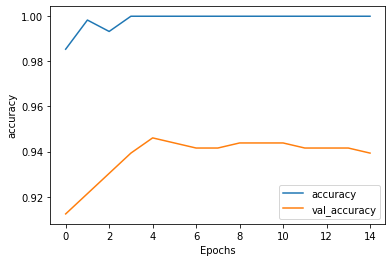

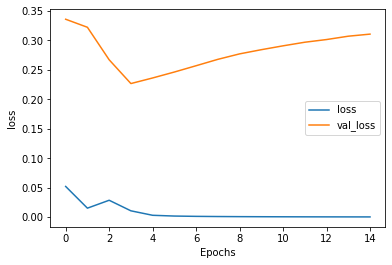

In [91]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [92]:
txt = ["A WeWork shareholder has taken the company to court over the near-$1.7bn (£1.3bn) leaving package approved for ousted co-founder Adam Neumann."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
print(pred)
# print(pred, labels[np.argmax(pred)])

[[4.1098036e-09 1.2237208e-09 1.7163440e-04 8.1886822e-07 9.9845636e-01
  1.3711412e-03]]


In [93]:
np.argmax(pred)

4

In [94]:
labels[np.argmax(pred)]

'entertainment'